In [60]:
# Importation des bibliothèques nécessaires
import os                        # Bibliothèque pour les opérations liées au système d'exploitation
import pandas as pd              # Bibliothèque pour la manipulation de données tabulaires
import numpy as np               # Bibliothèque pour les opérations numériques
import matplotlib.pyplot as plt  # Bibliothèque pour la création de graphiques
import seaborn as sns            # Bibliothèque pour la visualisation avancée des données


# Vision Globale de la Dataset Fraud

La dataset **" Fraud "** est destinée à la détection de transactions frauduleuses par carte de crédit :

- Taille de la Dataset: **471 MO**
- Format: **CSV**
- Nombre de lignes: **6362620**
- Nombre de colonnes: **11**

C'est un problème de classification binaire visant à **prédire si une transaction est frauduleuse.**

**Données déséquilibrées :** Seulement **8213** transactions frauduleuses parmi 6354407 transactions.

[**Télécharger la dataset**](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data)

In [61]:
# Chargement du jeu de données depuis le fichier CSV
data = pd.read_csv('Fraud.csv')
# Taille de la Dataset :
Taille =  os.path.getsize('Fraud.csv' ) / (1024 * 1024)
print(f'La Taille de la Dataset est : {Taille} MO ')
# Nombre de Ligne et colonnes :
num_rows, num_columns = data.shape
print("Nombre de lignes :", num_rows)
print("Nombre de colonnes :", num_columns)
# Déséquilibre des données :
fraud_counts = data['isFraud'].value_counts()
print("Nombre total de transactions frauduleuses :", fraud_counts[1])



La Taille de la Dataset est : 470.67144680023193 MO 
Nombre de lignes : 6362620
Nombre de colonnes : 11
Nombre total de transactions frauduleuses : 8213


## Dictionnaire des données :

1. **step** : Représente une unité de temps dans le monde réel. 1 étape équivaut à 1 heure de temps. Nombre total d'étapes : 744(simulation sur 30 jours).

2. **type** : CASH-IN, CASH-OUT, DEBIT, PAYMENT et TRANSFER.

3. **amount** : Montant de la transaction en monnaie locale.

4. **nameOrig** : Client ayant initié la transaction.

5. **oldbalanceOrg** : Solde initial avant la transaction.

6. **newbalanceOrig** : Nouveau solde après la transaction.

7. **nameDest** : Client destinataire de la transaction.

8. **oldbalanceDest** : Solde initial du destinataire avant la transaction. 

9. **newbalanceDest** : Nouveau solde du destinataire après la transaction.

10. **isFraud** : Transactions effectuées par des agents frauduleux. Le comportement frauduleux vise à réaliser un profit en prenant le contrôle des comptes des clients et en vidant les fonds.

11. **isFlaggedFraud** : Modèle économique pour contrôler les transferts massifs entre comptes. Signale les tentatives illégales. Tentative illégale : transférer plus de 200 000 lors d'une seule transaction.

**Observation :** Dans les colonnes **`nameDest`** et **`nameOrig`**, le préfixe "M" indique un commerçant tandis que le préfixe "C" indique un client normal.


## Exploration et Analyse des Données :

In [62]:
# Affichage d'un échantillon aléatoire du DataFrame pour avoir un aperçu
data.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3108383,235,CASH_OUT,105420.65,C1973006478,0.00,0.00,C578227087,692752.79,798173.43,0,0
3221813,250,CASH_IN,78184.48,C396417066,111041.00,189225.48,C633895228,1358143.78,1279959.30,0,0
2674177,210,TRANSFER,793129.10,C1351083507,0.00,0.00,C1001972026,841020.71,1634149.81,0,0
3919580,284,PAYMENT,9037.91,C519360865,34543.29,25505.39,M1731549909,0.00,0.00,0,0
6206369,586,CASH_OUT,344400.66,C1399826464,0.00,0.00,C1860147024,6053588.24,6397988.89,0,0


In [63]:
# Obtention d'informations sur le jeu de données : types de données, valeurs non nulles, mémoire utilisée
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [64]:
# Vérification de l'existence de valeurs manquantes dans chaque colonne
print("Valeurs manquantes par colonne :")
data.isnull().sum()

Valeurs manquantes par colonne :


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [65]:
# Création d'une copie de la dataset pour les manipulations
df2 = data.copy()


C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_10100\1701385670.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


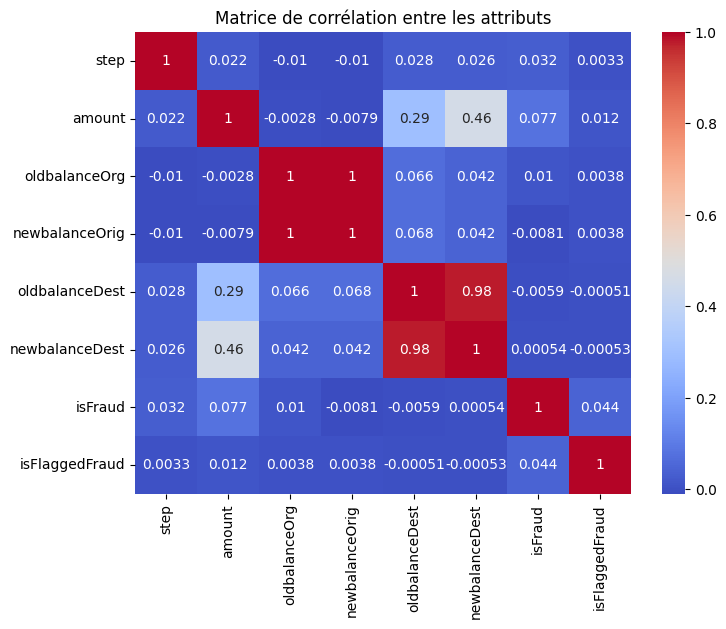

In [66]:
# Affichage de la matrice de corrélation entre les attributs
plt.figure(figsize=(8, 6))
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre les attributs")
plt.show()

Dans le cadre de notre analyse, us avons identifié une forte corrélation entre les attributs `newbalanceOrig` et `oldbalanceOrg`, ainsi qu'entre les attributs `newbalanceDest` et `oldbalanceDest`!. La corrélation entre ces paires d'attributs dépasse 0,7, ce qui indique une relation linéaire forte entre eux.

In [67]:
# Analyse de la colonne "amount" 
df2[df2['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


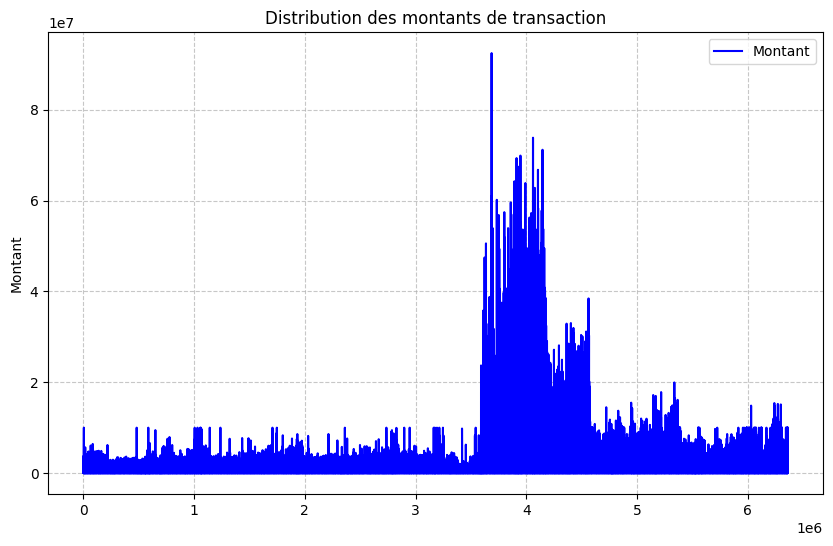

In [68]:
# Visualisation de la distribution des montants de transaction
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé de la courbe des montants
ax.plot(df2['amount'], color='b', label='Montant')

ax.set_title('Distribution des montants de transaction')
ax.set_ylabel('Montant')

ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()



En observant le graphique de distribution des montants de transaction, on peut constater que la majorité des transactions ont de **petites sommes**. il peut y avoir des transactions de **grosse somme** qui pourraient potentiellement être liées à des **fraudes.**

In [69]:
P = df2[(df2['amount']==0) & (df2['isFraud']==1) ].shape[0]/df2[df2['amount']==0].shape[0] * 100
print(f"Pourcentage de fraudes parmi les transactions avec montant de 0 :", P, "%")

# Vérification que toutes les transactions avec montant de 0 sont de type "CASH_OUT" et frauduleuses
zero_amount_cash_out_fraud = df2[(df2['amount'] == 0) & (df2['type'] == 'CASH_OUT') & (df2['isFraud'] == 1)]

if zero_amount_cash_out_fraud.shape[0] == df2[(df2['amount'] == 0) & (df2['isFraud'] == 1)].shape[0]:
    print("Toutes les transactions avec montant de 0 sont de type 'CASH_OUT' et sont frauduleuses.")
else:
    print("Il existe des transactions avec montant de 0 qui ne sont pas de type 'CASH_OUT' ou non frauduleuses.")


Pourcentage de fraudes parmi les transactions avec montant de 0 : 100.0 %
Toutes les transactions avec montant de 0 sont de type 'CASH_OUT' et sont frauduleuses.


On a observé que toutes les transactions ayant un **montant de 0** sont de **type "CASH_OUT"** et sont également marquées comme **frauduleuses** dans notre jeu de données.

In [70]:
# Calcul du nombre de transactions frauduleuses parmi celles avec un montant égal à oldbalanceOrg
P2 = df2[(df2['amount'] == df2['oldbalanceOrg']) & (df2['isFraud'] == 1)].shape[0]/df2[df2['amount'] == df2['oldbalanceOrg']].shape[0] * 100
print(f"Pourcentage de fraudes parmi les transactions avec montant égal à oldbalanceOrg :", P2, "%")

Pourcentage de fraudes parmi les transactions avec montant égal à oldbalanceOrg : 100.0 %


On a observé que toutes les transactions ayant un **montant égal à oldbalanceOrg** sont également marquées comme **frauduleuses**.

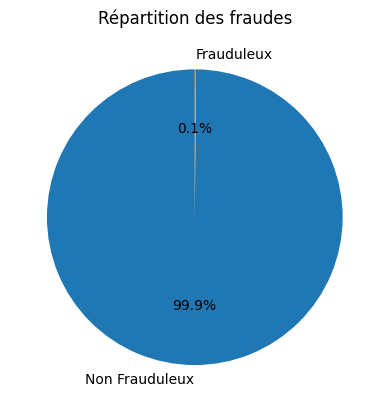

In [71]:
# Analyse de la colonne "isFraud" 
df2.isFraud.value_counts(normalize= True)
plt.pie(df2.isFraud.value_counts(normalize= True), labels=['Non Frauduleux', 'Frauduleux'], autopct='%1.1f%%', startangle=90)
plt.title("Répartition des fraudes")
plt.show()


L'ensemble de données est fortement déséquilibré, ce déséquilibre peut avoir un impact sur notre modèle d'entraînement. Il est important de traiter ce déséquilibre pour obtenir des résultats fiables.

In [72]:
# Analyse de la colonne "isFlaggedFraud" 
P3 = df2[(df2['isFlaggedFraud']==1) & (df2['isFraud']==1) ].shape[0]/df2[df2['isFlaggedFraud']==1].shape[0] * 100
print(f" Pourcentage des transactions signalées comme frauduleuses (flaggedfraud) qui sont réellement des fraudes :", P3, "%")

 Pourcentage des transactions signalées comme frauduleuses (flaggedfraud) qui sont réellement des fraudes : 100.0 %


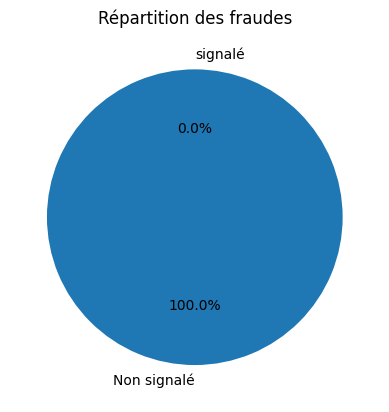

In [73]:
df2.isFlaggedFraud.value_counts()
plt.pie(df2.isFlaggedFraud.value_counts(normalize= True), labels=['Non signalé', 'signalé'], autopct='%1.1f%%', startangle=90)
plt.title("Répartition des fraudes")
plt.show()

In [74]:
# Analyse de la colonne "Type" 
df2['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

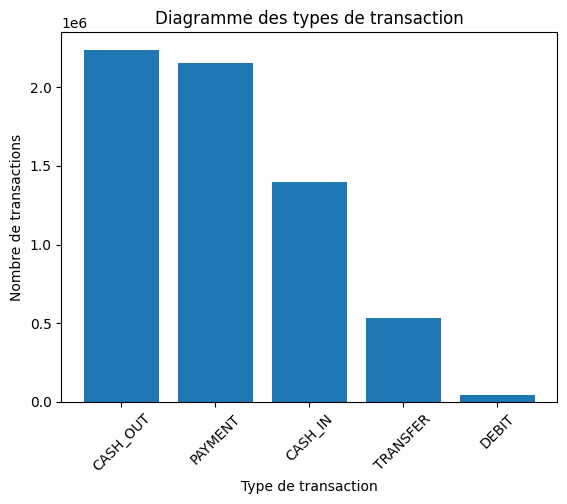

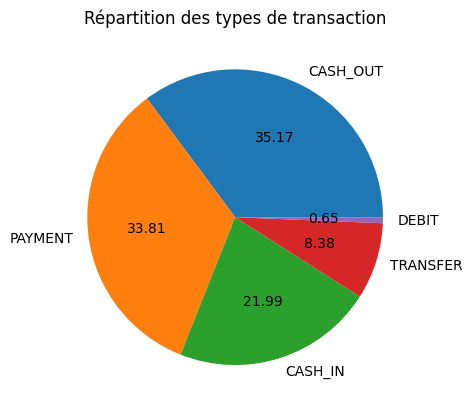

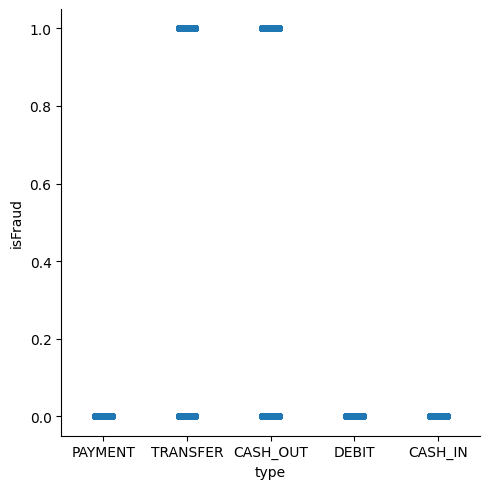

In [75]:
# Illustration du nombre de transactions pour chaque type
plt.bar(df2['type'].value_counts().index, df2['type'].value_counts().values)
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions')
plt.title('Diagramme des types de transaction')
plt.xticks(rotation=45)
plt.show()

# Illustration du pourcentage de chaque type de transaction
plt.pie(df2['type'].value_counts(), autopct='%.2f', labels=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'])
plt.title('Répartition des types de transaction')
plt.show()

# Illustration des transactions frauduleuses et non frauduleuses pour chaque type
sns.catplot(data=df2, x="type", y="isFraud")


In [76]:
# vérifier la répartition des types de transactions en fonction de la fraude 
df2.groupby(['isFraud', 'type']).size().unstack(fill_value=0)


type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


Toutes les transactions **frauduleuses** sont associées aux types `TRANSFER` et `CASH_OUT`

# Prétraitement des Données :

In [77]:
# Nombre de valeurs manquantes (NaN) par colonne
print("Nombre de NaN par colonne:\n",df2.isnull().sum())
print('_____________________________________')

# Nombre de valeurs vides par colonne
print("Nombre de valeurs vides par colonne:\n",df2.eq('').sum())

Nombre de NaN par colonne:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
_____________________________________
Nombre de valeurs vides par colonne:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Après l'analyse de l'impact potentiel sur notre et notre modèle, nous avons pris la décision de supprimer les attributs '`oldbalanceOrig` et `oldbalanceDest`' de notre jeu de données.

Explication de la Décision : 

In [78]:
# On verife la correlation de chaqu'une avec la target 'isFraud'
df2.corr()['isFraud']


C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_10100\2705232640.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['isFraud']


step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

On remarque que `oldbalanceOrg` et `oldbalanceDest` sont plus corrélés avec la variable cible `isFraud`, tandis que `oldbalanceDest` et `newbalanceDest` sont moins corrélés avec `isFraud`.


In [79]:
# Supprimer les attributs de notre jeu de données.
df2 = df2.drop(columns=['newbalanceDest', 'newbalanceOrig'])


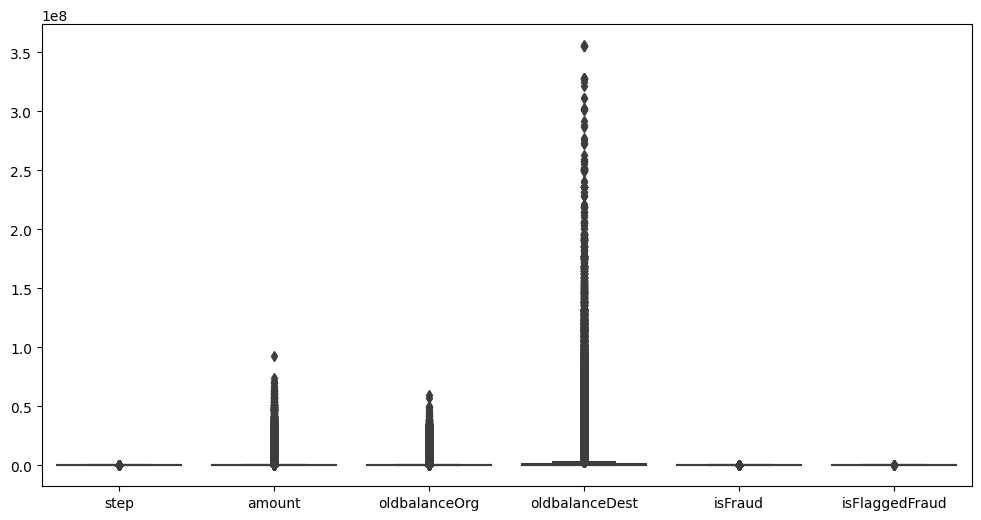

In [80]:
# Visualisation des valeurs aberrantes (Outliers) :
fig = plt.figure(figsize=(12,6))
sns.boxplot(df2)
plt.show()

In [81]:
# Création d'une nouvelle colonne 'hours' pour représenter l'heure au format 24H
# en utilisant la colonne 'step' et en la divisant par 24
df2['hours'] = df2['step'] % 24


In [82]:
df2.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,hours
3566743,260,CASH_OUT,89798.55,C1548600662,61165.00,C1483985177,0.00,0,0,20
2985859,231,CASH_OUT,168327.91,C887360529,240.00,C794889943,45339.33,0,0,15
1874160,164,PAYMENT,7895.10,C1819819874,0.00,M1338832459,0.00,0,0,20
5346554,375,CASH_IN,125987.63,C1891794223,1118848.62,C1816339809,5558373.75,0,0,15
2860493,227,CASH_OUT,319451.01,C51770682,0.00,C335295102,1700628.84,0,0,11


In [83]:
# Visualisation  des heures des transactions frauduleuses
df2.groupby('hours')['isFraud'].sum()

hours
0     300
1     358
2     372
3     326
4     274
5     366
6     358
7     328
8     368
9     341
10    375
11    324
12    339
13    346
14    353
15    341
16    345
17    353
18    343
19    342
20    340
21    347
22    351
23    323
Name: isFraud, dtype: int64

On remarque qu'il n'y a pas d'heure spécifique dominante pour les transactions frauduleuses. Dans ce cas, nous pourrions envisager de supprimer la colonne `hours`

In [84]:
df2 = df2.drop('hours', axis=1)

Dans ce cas, puisque la colonne `hours` n'a pas révélé de tendance spécifique dans les heures des transactions frauduleuses, et la colonne `step` ne contient plus d'informations pertinentes, nous pourrions envisager de supprimer la colonne `step` également.

In [85]:
df2 = df2.drop('step', axis=1)

In [86]:
# Détection des valeurs aberrantes à l'aide de la méthode des intervalles interquartiles (IQR)
def trouver_outliers(i):
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    EIQ = Q3 - Q1

    LI= Q1 - (1.5*EIQ)
    LS= Q3 + (1.5*EIQ)

    print("la limite inférieur est ",LI)
    print("la limite superieur est ",LS)
    
    out_min = df2[df2[i] < LI]
    out_max =  df2[df2[i] > LS]
    
    print('le nombre des outliers qui sont inf ', out_min.shape[0])
    print('le nombre des outliers qui sont sup ', out_max.shape[0])

In [87]:
trouver_outliers('amount')

la limite inférieur est  -279608.29125
la limite superieur est  501719.33875
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  338078


In [88]:
trouver_outliers('oldbalanceOrg')

la limite inférieur est  -160972.7625
la limite superieur est  268287.9375
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  1112507


In [89]:
trouver_outliers('oldbalanceDest')

la limite inférieur est  -1414555.06125
la limite superieur est  2357591.76875
le nombre des outliers qui sont inf  0
le nombre des outliers qui sont sup  786135


On observe la présence de plusieurs **valeurs aberrantes** dans ces colonnes. Cependant, il n'est pas conseillé de supprimer ces valeurs, car cela pourrait entraîner une perte d'informations cruciales pour notre objectif d'analyse. Par exemple, dans les colonnes 'amount' et 'oldbalanceOrg', des montants de transactions plus élevés pourraient potentiellement indiquer des transactions frauduleuses.

In [90]:
# Vérification des valeurs en duplication
df2.duplicated().sum()

0

In [91]:
# Sélection et encodage des valeurs qualitatives
for col in df2.select_dtypes('object') :
    print(f'{col:-<20}{df2[col].unique()}\n')
    print('       _________________________________________________________________\n')


type----------------['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

       _________________________________________________________________

nameOrig------------['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']

       _________________________________________________________________

nameDest------------['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']

       _________________________________________________________________



In [92]:
#'type' présente 5 valeurs uniques, ce qui signifie que nous pouvons procéder à la manipulation (encodage) de cette colonne.
df2['type'] = df2['type'].replace(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],[1, 2, 3, 4, 5])
df2.sample(n=5)

,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
1945305,5,128625.75,C766674508,41708.00,C2049617708,0.00,0,0
1230619,3,296346.17,C295134010,0.00,C1410590157,3629785.31,0,0
3230099,3,64395.47,C779859652,0.00,C952030559,186222.17,0,0
2358876,2,273579.29,C1540129233,5367.13,C862575802,2396086.72,0,0
5002792,3,458787.06,C1645882679,13833.00,C884390506,7329.67,0,0


In [93]:
# Analyse et Transformation des Colonnes 'nameOrig' et 'nameDest'
print(f"Le pourcentage des valeurs uniques pour la colonne 'nameOrig' est {df2['nameOrig'].unique().shape[0] / df2['nameOrig'].shape[0] * 100}%")
print(f"Le pourcentage des valeurs uniques pour la colonne 'nameOrig' est {df2['nameDest'].unique().shape[0] / df2['nameDest'].shape[0] * 100}%")


Le pourcentage des valeurs uniques pour la colonne 'nameOrig' est 99.85362947967975%
Le pourcentage des valeurs uniques pour la colonne 'nameOrig' est 42.78680795018404%


In [94]:
def trouver_char_unique(i) :
    for caractere in df2[i].str[0].unique() :
        
        matching_rows = df2[df2[i].str.startswith(caractere)]
        print(f"Caractère : {caractere}")
        print(matching_rows[i])
        print("==========")

In [95]:
trouver_char_unique('nameOrig')
trouver_char_unique('nameDest')


Caractère : C
0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: object
Caractère : M
0          M1979787155
1          M2044282225
4          M1230701703
5           M573487274
6           M408069119
              ...     
6362312    M1112540487
6362314    M1878955882
6362316     M675916850
6362318    M1126011651
6362319     M747723689
Name: nameDest, Length: 2151495, dtype: object
Caractère : C
2           C553264065
3            C38997010
9           C195600860
10          C997608398
15          C476402209
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 4211125, dtype: object


En observant les pourcentages obtenus pour les colonnes `nameOrig` et `nameDest`, il est évident qu'il existe un grand nombre de valeurs uniques. Etant donné que ces colonnes ne contiennent que des chaînes de caractères, elles peuvent avoir une utilité limitée dans la prédiction des fraudes. Dans le but de réduire la complexité, nous chercherons à réduire le nombre de valeurs uniques. Nous constatons également que les caractères `C` et `M` sont utilisés pour désigner respectivement un client et un commerçant. Cette observation pourrait nous aider dans notre démarche de regroupement des valeurs.

In [96]:
# Nous allons vérifier si les transactions frauduleuses ont été effectuées à destination d'individus ou d'entreprises.
def nbr_tans_fraud(i):
    for caractere in df2[i].str[0].unique():
        frauds_by_character = df2[df2['isFraud'] == 1][i].str.startswith(caractere)
        print(f'Pour les lignes qui commencent par le caractère "{caractere}", il y a {frauds_by_character.sum()} fraudes')

nbr_tans_fraud('nameDest')

Pour les lignes qui commencent par le caractère "M", il y a 0 fraudes
Pour les lignes qui commencent par le caractère "C", il y a 8213 fraudes


En ce qui concerne `nameOrig`, toutes les transactions sont effectuées par des clients. Nous n'observons rien de particulier dans cet attribut, et nous pourrions envisager de le supprimer. Cependant, pour `nameDest`, nous remarquons une tendance intéressante : toutes les transactions frauduleuses sont effectuées vers des clients, plutôt que vers des marchands.

In [97]:
def remplacer_uniques(i):
    for caractere in df2[i].str[0].unique():
        matching_rows = df2[df2[i].str.startswith(caractere)]
        df2.loc[matching_rows.index, i] = caractere

# Remplacer les valeurs uniques dans la colonne 'nameDest'
remplacer_uniques('nameDest')


In [98]:
# Encodage de la colonne 'nameDest'
df2['nameDest'] = df2['nameDest'].replace(['C', 'M'],[0, 1])
# Suppression de la colonne 'nameOrig'
df2.drop('nameOrig', axis=1, inplace=True)

In [100]:
df2.sample(n=5)

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
6318783,5,277622.85,17012780.21,0,7140970.53,0,0
1830546,3,135917.83,0.00,0,6677609.02,0,0
1283690,5,57563.51,3809196.60,0,1055182.26,0,0
6327758,1,10864.50,24984.00,1,0.00,0,0
4154084,3,243355.00,205.00,0,0.00,0,0


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   nameDest        int64  
 4   oldbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(3), int64(4)
memory usage: 339.8 MB


L'ensemble de données est déséquilibré, avec beaucoup plus d'informations sur les transactions normales que sur les transactions frauduleuses. Cela peut engendrer des problèmes de classification erronée de la classe minoritaire en utilisant des algorithmes d'apprentissage. Pour atténuer ce déséquilibre, il existe des techniques de suréchantillonnage et de sous-échantillonnage. Ces approches permettent soit de réduire le nombre d'observations de la classe majoritaire, soit d'augmenter celui de la classe minoritaire.

Cela est illustré dans la figure ci-dessous :
<h3><a href="https://www.institutdesactuaires.com/global/gene/link.php?doc_id=16271&fg=1">Équilibrage des Données : Suréchantillonnage et Sous-échantillonnage</a></h3>
<img src='imgs/sursous.PNG' style='width:900px; height:300px;'>




In [103]:
# Utilisation du sous-échantillonnage

# Séparer nos classes en transactions frauduleuses et normales
tr_fraudes = df2[df2['isFraud'] == 1]
tr_normales = df2[df2['isFraud'] == 0]

# Réduire la classe majoritaire à la taille de la classe minoritaire
taille_tr_fraude = len(df2[df2['isFraud'] == 1])
tr_normales_sous = tr_normales.sample(taille_tr_fraude, random_state=1)

# Fusionner à nouveau nos classes après sous-échantillonnage
sous_echant = pd.concat([tr_fraudes, tr_normales_sous])
sous_echant = sous_echant.reset_index(drop=True)


In [104]:
sous_echant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   nameDest        16426 non-null  int64  
 4   oldbalanceDest  16426 non-null  float64
 5   isFraud         16426 non-null  int64  
 6   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 898.4 KB


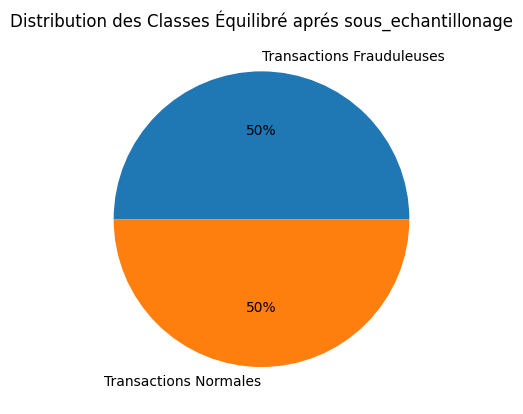

In [105]:
# Afficher la nouvelle distribution: 

plt.pie(sous_echant['isFraud'].value_counts(),
labels=['Transactions Frauduleuses', 'Transactions Normales'],
autopct='%1.0f%%')
        
plt.title('Distribution des Classes Équilibré aprés sous_echantillonage')
plt.show()

In [107]:
sous_echant.sample()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
12449,5,165267.79,1591707.23,0,844872.8,0,0


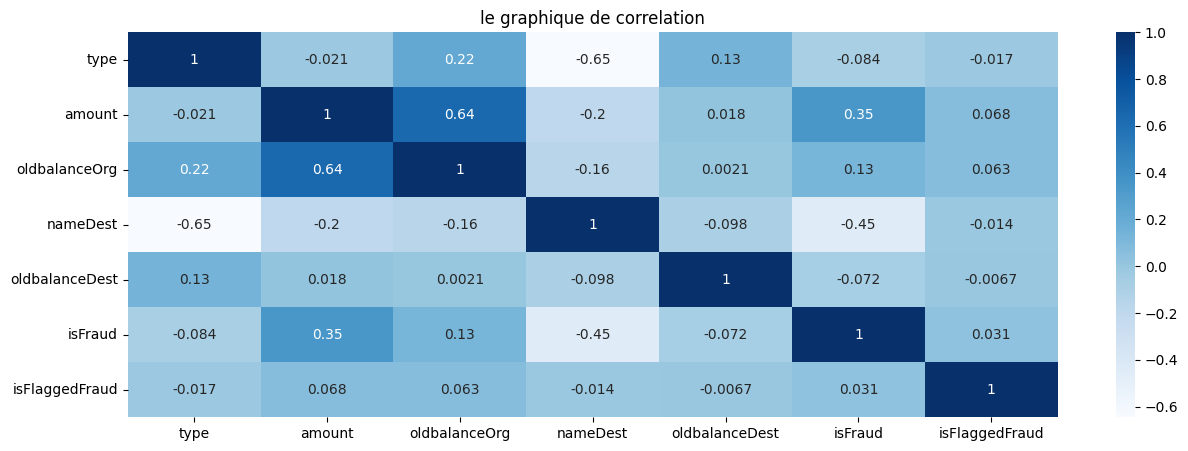

In [106]:
plt.figure(figsize=(15,5))
sns.heatmap(sous_echant.corr(), cmap='Blues', annot=True)
plt.title('le graphique de correlation')
plt.show()

In [108]:
# Enregistrement du DataFrame nettoyé au format CSV
sous_echant.to_csv('cleaned_data.csv', index=False)